#### Step 1: Setup

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Paths
train_data_dir = '/kaggle/input/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Train'
test_data_dir = '/kaggle/input/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Test'

#### Step 2: Image Size and Data Augmentation for Training

In [77]:
img_size = (256, 256)
batch_size = 64

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.09,
    height_shift_range=0.09,
    shear_range=0.09,
    zoom_range=0.09,
    fill_mode='nearest',
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

#### Step 3: Load the Data

In [78]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 608 images belonging to 6 classes.
Found 150 images belonging to 6 classes.
Found 75 images belonging to 6 classes.


#### Step 4: Creating Model Architecture

In [79]:
# Use pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

#### Step 5: Model Training

Epoch 1/28
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.3376 - loss: 2.0090 - val_accuracy: 0.4667 - val_loss: 1.4499
Epoch 2/28
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.4407 - loss: 1.6126 - val_accuracy: 0.5200 - val_loss: 1.4058
Epoch 3/28
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.4394 - loss: 1.5230 - val_accuracy: 0.4867 - val_loss: 1.3730
Epoch 4/28
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.4642 - loss: 1.4031 - val_accuracy: 0.5067 - val_loss: 1.3658
Epoch 5/28
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.5017 - loss: 1.3935 - val_accuracy: 0.5067 - val_loss: 1.3153
Epoch 6/28
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.4975 - loss: 1.3493 - val_accuracy: 0.5133 - val_loss: 1.2922
Epoch 7/28
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.5077 - loss: 1.3587 - val_accuracy: 0.5333 - val_loss: 1.2924
Epoch 8/28
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.5557 - loss: 1.2292 - val_accuracy: 0.5200 - val_loss:

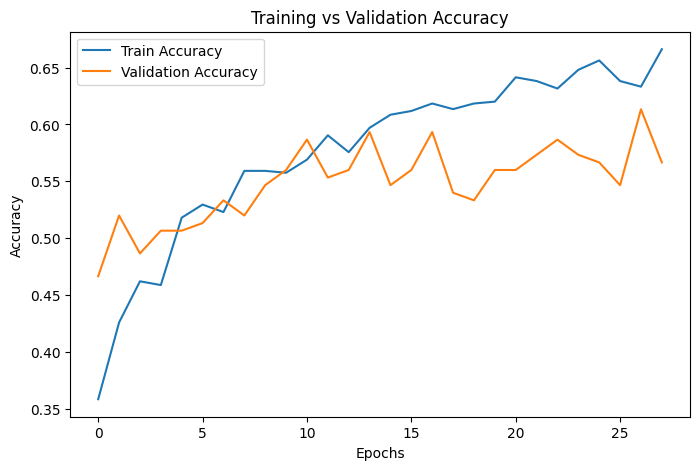

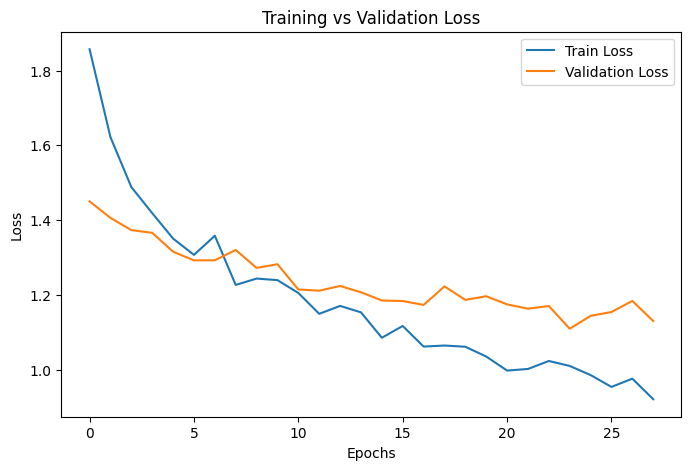

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,446,484 (249.66 MB)

 Trainable params: 16,910,598 (64.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 33,821,198 (129.02 MB)

In [80]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(
    train_generator,
    epochs=28,
    validation_data=validation_generator
)

# Accuracy plot
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.summary()

#### Step 6: Model Evaluation

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 440ms/step - accuracy: 0.7248 - loss: 1.0485
Test accuracy: 0.7200000286102295


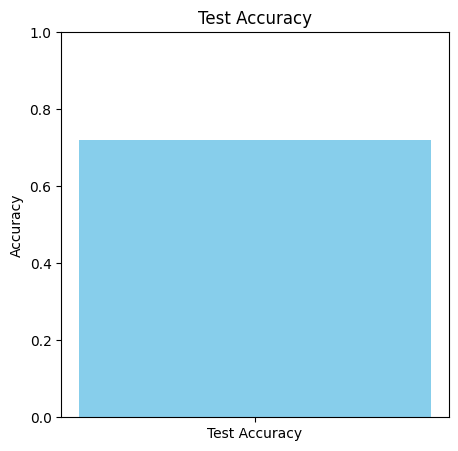

In [81]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Visualization
plt.figure(figsize=(5,5))
plt.bar(['Test Accuracy'], [test_acc], color='skyblue')
plt.ylim(0,1)
plt.title("Test Accuracy")
plt.ylabel("Accuracy")
plt.show()

#### Step 7: Model Predictions

In [82]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Path to the image for test
image_path = '/kaggle/input/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Test/fear/13.jpg'

img = image.load_img(image_path, target_size=(256,256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values to be between 0 and 1

predictions = model.predict(img_array)

emotion_labels = ['Surprise', 'Delight', 'Sadness', 'Fear', 'Joy', 'Anger']
predicted_emotion = emotion_labels[np.argmax(predictions)]

print(f'The predicted emotion is: {predicted_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
The predicted emotion is: Fear


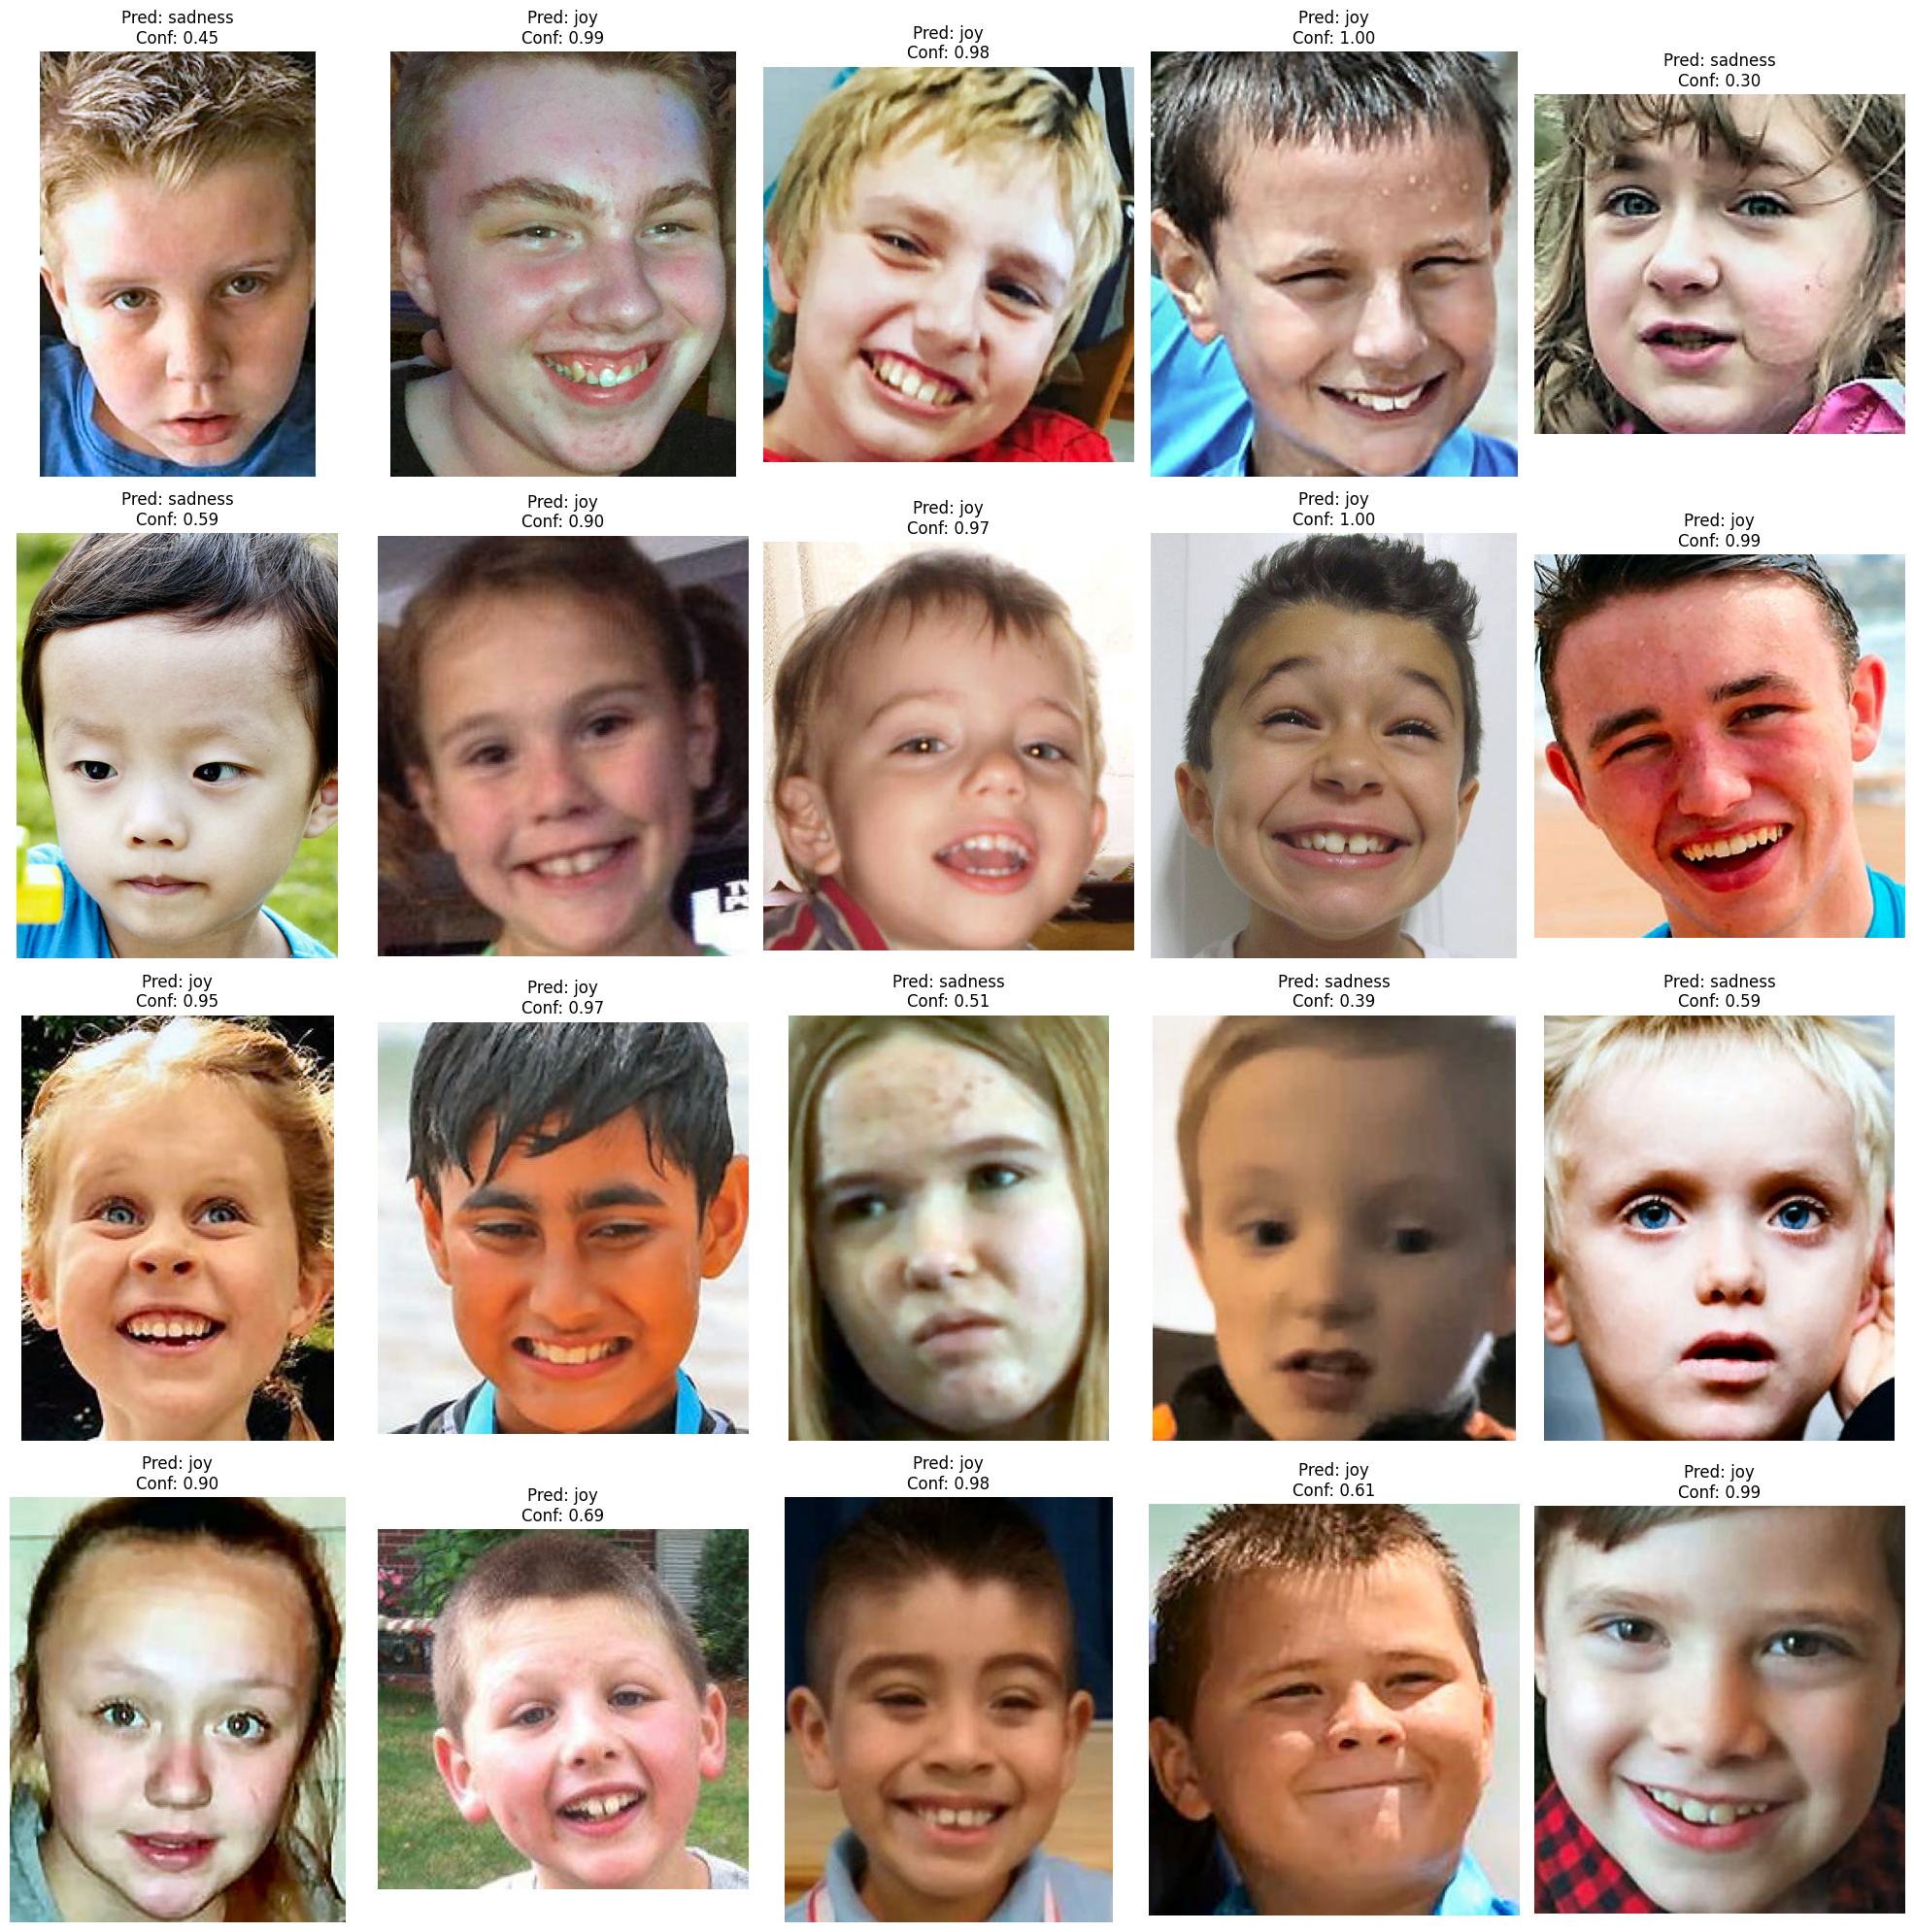

In [86]:
import numpy as np
import random
from tensorflow.keras.preprocessing import image

emotion_labels = list(train_generator.class_indices.keys())

# Pick 10 random indices from test set
random_indices = random.sample(range(len(test_generator.filenames)), 20)

plt.figure(figsize=(20,20))

for i, idx in enumerate(random_indices):
    img_path = test_generator.filepaths[idx]
    img = image.load_img(img_path, target_size=(256,256))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array, verbose=0)
    predicted_label = emotion_labels[np.argmax(prediction)]
    confidence = np.max(prediction)
    
    # Plot
    plt.subplot(4,5,i+1)
    plt.imshow(image.load_img(img_path))
    plt.axis("off")
    plt.title(f"Pred: {predicted_label}\nConf: {confidence:.2f}")
    
plt.tight_layout()
plt.show()